# Basics of AI, Machine Learning, and Deep Learning

## About This Notebook
This notebook is a hands-on companion to Module 2. 
Follow the code examples, read the explanations, and experiment with the implementations.

## 2.3 Loss Functions

In [11]:
# TensorFlow example
import tensorflow as tf

# True label (one-hot encoded) and prediction probabilities
true_labels = [[0, 1, 0]]  # Disease A
predictions = [[0.1, 0.7, 0.2]]

loss = tf.keras.losses.CategoricalCrossentropy()
print("Loss:", loss(true_labels, predictions).numpy())

Loss: 0.35667497


In [12]:
# TensorFlow binary cross-entropy example
binary_loss = tf.keras.losses.BinaryCrossentropy()
print("Binary Loss:", binary_loss([1], [0.8]).numpy())


Binary Loss: 0.22314338


In [13]:
# TensorFlow MSE example
mse = tf.keras.losses.MeanSquaredError()
print("MSE Loss:", mse([100], [110]).numpy())

MSE Loss: 100


In [14]:
# TensorFlow MAE example
mae = tf.keras.losses.MeanAbsoluteError()
print("MAE Loss:", mae([100], [110]).numpy())

MAE Loss: 10


## Data Augmentation

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 6033061.81it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 156870.88it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1521785.89it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4544496.37it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



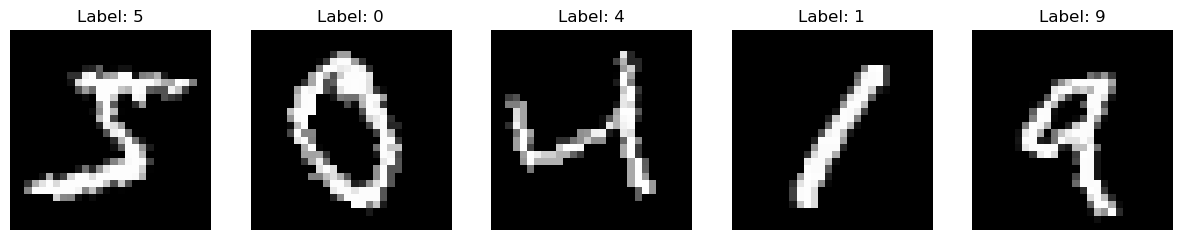

In [16]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define simple augmentation transforms
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(20),  # Randomly rotate images by ±20 degrees
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ToTensor()  # Convert images to PyTorch tensors
])

# Load MNIST dataset with augmentation for training
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=augmentation_transforms)

# Visualize augmented images
def visualize_augmented_data(dataset, n_images=5):
    fig, axes = plt.subplots(1, n_images, figsize=(15, 5))
    for i in range(n_images):
        img, label = dataset[i]  # Access image and label
        img = img.squeeze(0).numpy()  # Convert tensor to NumPy array
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

# Visualize 5 augmented images
visualize_augmented_data(mnist_train)

## 2.5 Supervised Learning Algorithms

### Logistic Regression (Binary Classification)

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Binary classification: Class 2 vs. Not Class 2

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Decision Trees (Multiclass Classification)

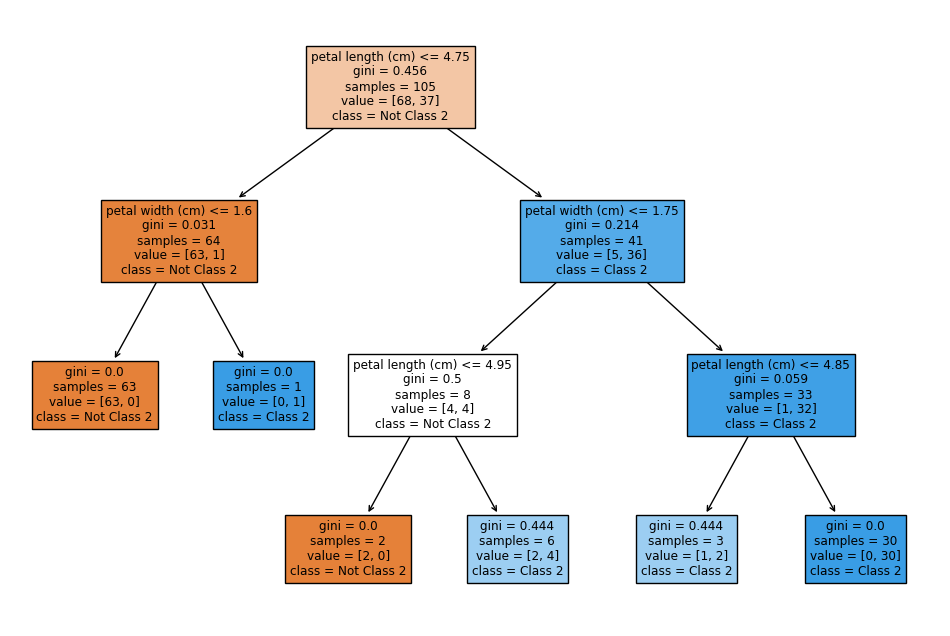

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=["Not Class 2", "Class 2"], filled=True)
plt.show()

## Unsupervised Learning Algorithms

### K-Means Clustering

C:\Users\khush\anaconda3\envs\khushi_ecoup\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\khush\anaconda3\envs\khushi_ecoup\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


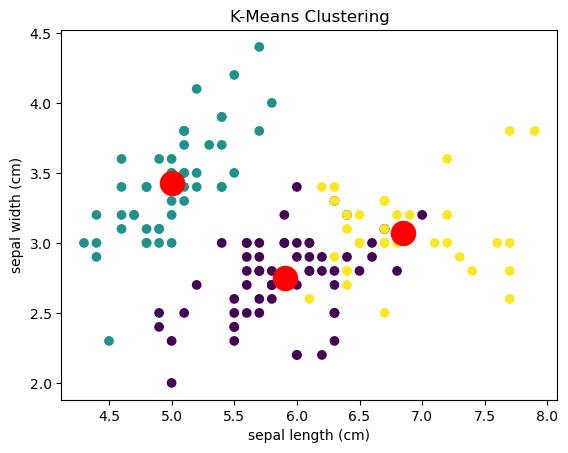

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris.data)

# Visualize clusters (using first two features)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title("K-Means Clustering")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Introduction to Deep Learning

## Neural Networks

A neural network processes input data through layers of interconnected neurons. It learns by adjusting weights through **backpropagation** to minimize error.

### Key Components:
1. **Input Layer**: Accepts raw data (e.g., pixel values of an image).
2. **Hidden Layers**: Extract features and learn patterns.
3. **Output Layer**: Produces the final prediction.

### Activation Functions:
- **ReLU**: Introduces non-linearity for hidden layers.
- **Softmax**: Converts output into probabilities for classification.

### Building a Simple Neural Network (MNIST)

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.9175 - val_loss: 0.1490 - val_accuracy: 0.9578
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1277 - accuracy: 0.9614 - val_loss: 0.1145 - val_accuracy: 0.9667
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0870 - accuracy: 0.9744 - val_loss: 0.1028 - val_accuracy: 0.9709
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0912 - val_accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 0s 704us/step - loss: 0.0777 - accuracy: 0.9760
Test Accuracy: 0.9760000109672546


## Practice Exercises

1. Modify the Decision Tree example to adjust the `max_depth` parameter and observe its impact on accuracy.
2. Experiment with adding layers or neurons to the neural network and compare performance.
3. Use a different dataset (e.g., Digits or CIFAR-10) to apply K-Means clustering or train a neural network.
